In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df_raw = pd.read_csv("../data/mtl_eval_result.txt", header=0, error_bad_lines=False, delimiter='\t', engine='python',na_values="");


/tmp/ipykernel_796064/3575167121.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_raw = pd.read_csv("../data/mtl_eval_result.txt", header=0, error_bad_lines=False, delimiter='\t', engine='python',na_values="");


In [15]:
print(df_raw)

                消耗   base   V1.2   V2.2   V3.1   V4.2  V4.2.1   V5.1
0         accuracy  0.761  0.734   0.76  0.715  0.761   0.771  0.761
1    ovo_macro_auc  0.839  0.757   0.82  0.725  0.823   0.839  0.838
2  macro_precision  0.684  0.547   0.65  0.514   0.65   0.686  0.676
3     macro_recall  0.556  0.525  0.545  0.504  0.556   0.553  0.551
4               充值   base   V1.2   V2.2   V3.1   V4.2  V4.2.1   V5.1
5         accuracy  0.971  0.965  0.955  0.942  0.965   0.972  0.971
6    ovo_macro_auc  0.871  0.724  0.838  0.736  0.852   0.874  0.869
7  macro_precision  0.715  0.409   0.46  0.371  0.617   0.652  0.659
8     macro_recall  0.398  0.466  0.477  0.445  0.462   0.408  0.391


In [16]:

model_version=df_raw.columns.values.tolist()[1:]

print("-"*10+"model version"+"-"*10)
print(model_version)

print("-"*10+"cost"+"-"*10)

cost_metrics_acc=df_raw.values[0,1:].astype('float32')
cost_metrics_auc=df_raw.values[1,1:].astype('float32')
cost_metrics_precision=df_raw.values[2,1:].astype('float32')
cost_metrics_recall=df_raw.values[3,1:].astype('float32')
print(cost_metrics_acc)
print(cost_metrics_auc)
print(cost_metrics_precision)
print(cost_metrics_recall)
print("-"*10+"recharge"+"-"*10)

recharge_metrics_acc=df_raw.values[5,1:].astype('float32')
recharge_metrics_auc=df_raw.values[6,1:].astype('float32')
recharge_metrics_precision=df_raw.values[7,1:].astype('float32')
recharge_metrics_recall=df_raw.values[8,1:].astype('float32')
print(recharge_metrics_acc)
print(recharge_metrics_auc)
print(recharge_metrics_precision)
print(recharge_metrics_recall)

----------model version----------
['base', 'V1.2', 'V2.2', 'V3.1', 'V4.2', 'V4.2.1', 'V5.1']
----------cost----------
[0.761 0.734 0.76  0.715 0.761 0.771 0.761]
[0.839 0.757 0.82  0.725 0.823 0.839 0.838]
[0.684 0.547 0.65  0.514 0.65  0.686 0.676]
[0.556 0.525 0.545 0.504 0.556 0.553 0.551]
----------recharge----------
[0.971 0.965 0.955 0.942 0.965 0.972 0.971]
[0.871 0.724 0.838 0.736 0.852 0.874 0.869]
[0.715 0.409 0.46  0.371 0.617 0.652 0.659]
[0.398 0.466 0.477 0.445 0.462 0.408 0.391]


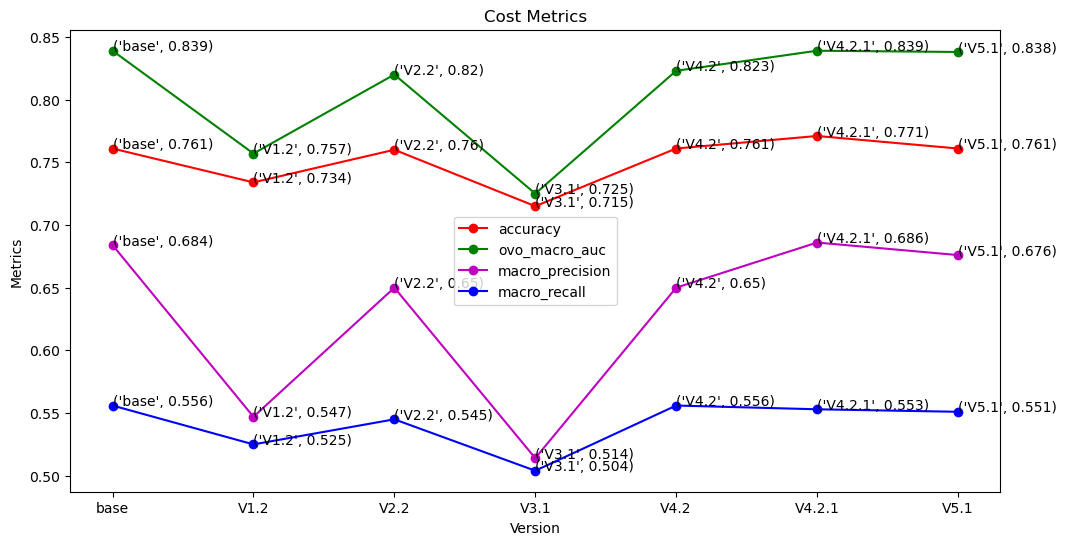

In [19]:
plt.figure(figsize=(12, 6)) 

plt.plot(model_version,cost_metrics_acc , c='r',marker='o', label=df_raw.values[0,0])
plt.plot(model_version,cost_metrics_auc , c='g',marker='o', label=df_raw.values[1,0])
plt.plot(model_version,cost_metrics_precision , c='m', marker='o', label=df_raw.values[2,0])
plt.plot(model_version,cost_metrics_recall , c='b', marker='o',label=df_raw.values[3,0])

for x, y in zip(model_version, cost_metrics_acc):  
    plt.text(x, y, (x, y))

for x, y in zip(model_version, cost_metrics_auc):  
    plt.text(x, y, (x, y))
    
for x, y in zip(model_version, cost_metrics_precision):  
    plt.text(x, y, (x, y))
    
for x, y in zip(model_version, cost_metrics_recall):  
    plt.text(x, y, (x, y))
    
plt.xlabel('Version')
plt.ylabel('Metrics')
plt.title("Cost Metrics")
plt.legend(loc='center')
plt.show()

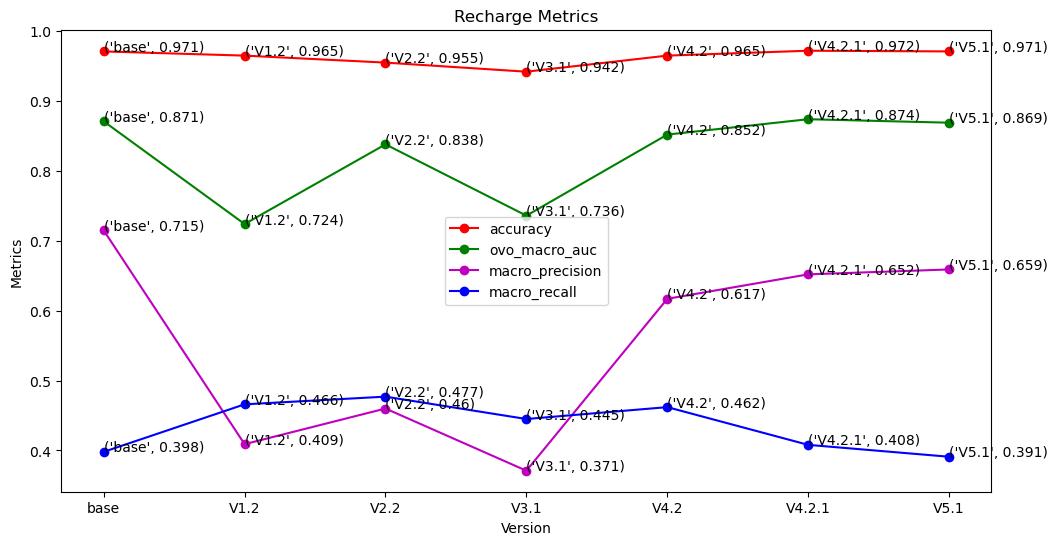

In [20]:
plt.figure(figsize=(12, 6)) 


plt.plot(model_version,recharge_metrics_acc , c='r', marker='o',label=df_raw.values[5,0])
plt.plot(model_version,recharge_metrics_auc , c='g', marker='o',label=df_raw.values[6,0])
plt.plot(model_version,recharge_metrics_precision , c='m',marker='o', label=df_raw.values[7,0])
plt.plot(model_version,recharge_metrics_recall , c='b',marker='o', label=df_raw.values[8,0])

for x, y in zip(model_version, recharge_metrics_acc):  
    plt.text(x, y, (x, y))

for x, y in zip(model_version, recharge_metrics_auc):  
    plt.text(x, y, (x, y))
    
for x, y in zip(model_version, recharge_metrics_precision):  
    plt.text(x, y, (x, y))
    
for x, y in zip(model_version, recharge_metrics_recall):  
    plt.text(x, y, (x, y))

plt.xlabel('Version')
plt.ylabel('Metrics')
plt.legend(loc='center')
plt.title("Recharge Metrics")

plt.show()